<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4_Nuclear/blob/main/Lab4_Poisson_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import poisson
from scipy.stats import chi2

In [ ]:
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Nuclear/2023_12_14/1_Background.tsv'
data = np.genfromtxt(URL, delimiter='\t', skip_header=11, usecols=2)
#QTY = 40
#s = np.random.choice(data, QTY)
s = data
m = len(s)
n = s.mean()
freqs = s / m
#print(s.mean(), s.std())
I_background = s.mean() / 10
print(f'Bacground intensity I {I_background:.2f} counts/s')

In [ ]:
BINS = 30
DOF = BINS - 2
def expected(x, m):
  return poisson(n).pmf(x) * m
def observed(i):
  ans = 0
  for counts in s:
    if i == counts:
      ans += 1
  return ans

Ok = np.array([observed(i) for i in range(BINS)])
Ek = np.array([expected(i, m) for i in range(BINS)])

chisquare0 = np.sum((Ok - Ek)**2 / Ek) / DOF
#for i in range(BINS):
#  print(f'{i}, {Ok[i]}, {Ek[i]:.1f}, {(Ok[i] - Ek[i])**2 / Ek[i]:.1f}')

#chi2.pdf(chisquare0 * DOF, DOF)
chisquare0

In [ ]:
count, bins, ignored = plt.hist(s, 6,  density=True, label='Poisson')
#plt.xticks(range(0, int(s.max())+1))
plt.legend()
plt.scatter(s, poisson.pmf(s, n), color='green')
plt.show()

In [ ]:
k3 = (s - s.mean())**3
K3 = k3.sum()/(m-1)
s.mean(), s.std(), K3

In [ ]:
n, err = s.mean(), s.std()/np.sqrt(m)
# relative error in intensity
n, err

In [ ]:
errK3 = np.sqrt(k3.var() / (m - 1))
K3, errK3

# Inverse square

In [ ]:
measurements = '''
1 429
2 491
3 646
4 805
5 1033
6 1465
7 2000
8 3077
9 5121
10 8587
'''
data = np.genfromtxt(measurements.splitlines())
x, I = data.T
h = 13
r = h - x
Ierr = np.sqrt(I)

plt.errorbar(x, I, yerr=Ierr, linestyle='')
plt.xlabel('r, [a.u.]')
plt.ylabel('Intesity, counts/min')
plt.grid()


In [ ]:
plt.plot(x, 1/np.sqrt(I), 'o')
plt.xlabel('x, [a.u.]')
plt.ylabel('Intesity^-1/2, counts/min')
plt.grid()


# Attenuation
$$I = I_0 e^{-\mu d}$$

In [ ]:
# colums 1 and 2 - width of aluminum plates between radiation source and GM intensity sensor (1e-6m)
# column 2 - Intensity counts/min
measurements = '''
2480 3070  13
2480 0     152
400 240    3592
400 320 3381
0  0   7280
3070 0 41
2160 0 259
1970 0 386
1510 0 913
1210 0 1716
900 0 2666
740 0 3041
590 0 3796
430 0 4362
400 0 4635
320 0 4918
240 0 5268
160 0 5675
80 0 6345
40 0 6593
3070 900 16
3070 1970 16
1970 900 52
1970 1510 29
3070 1510 21
'''
data = np.genfromtxt(measurements.splitlines())
d1, d2, I = data.T
d = d1 + d2
I /= 60 # counst/min -> counts/s
I_rel = I / I_background # relative
I_err = np.sqrt(I_rel)

plt.errorbar(d*1e-3, np.log(I_rel), yerr=I_err/I_rel, linestyle='', label='Measurements')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bck}$, [counts/s]')
plt.axhline(0, color='green', label='Background')
plt.grid()
plt.legend()


In [ ]:
plt.errorbar(d*1e-3, I_rel, yerr=I_err, linestyle='', label='Measurements')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $I/I_{bck}$, [counts/s]')
plt.axhline(I_background, color='green', label='Background')
plt.grid()
plt.yscale('log')
plt.legend()


# Attenuation coefficents $\mu$ of Aluminium

https://physics.nist.gov/PhysRefData/XrayMassCoef/ElemTab/z13.html



In [ ]:
coeff = '''
   1.00000E-03  1.185E+03  1.183E+03 
   1.50000E-03  4.022E+02  4.001E+02 
   1.55960E-03  3.621E+02  3.600E+02 
   1.55960E-03  3.957E+03  3.829E+03 
   2.00000E-03  2.263E+03  2.204E+03 
   3.00000E-03  7.880E+02  7.732E+02 
   4.00000E-03  3.605E+02  3.545E+02 
   5.00000E-03  1.934E+02  1.902E+02 
   6.00000E-03  1.153E+02  1.133E+02 
   8.00000E-03  5.033E+01  4.918E+01 
   1.00000E-02  2.623E+01  2.543E+01 
   1.50000E-02  7.955E+00  7.487E+00 
   2.00000E-02  3.441E+00  3.094E+00 
   3.00000E-02  1.128E+00  8.778E-01 
   4.00000E-02  5.685E-01  3.601E-01 
   5.00000E-02  3.681E-01  1.840E-01 
   6.00000E-02  2.778E-01  1.099E-01 
   8.00000E-02  2.018E-01  5.511E-02 
   1.00000E-01  1.704E-01  3.794E-02 
   1.50000E-01  1.378E-01  2.827E-02 
   2.00000E-01  1.223E-01  2.745E-02 
   3.00000E-01  1.042E-01  2.816E-02 
   4.00000E-01  9.276E-02  2.862E-02 
   5.00000E-01  8.445E-02  2.868E-02 
   6.00000E-01  7.802E-02  2.851E-02 
   8.00000E-01  6.841E-02  2.778E-02 
   1.00000E+00  6.146E-02  2.686E-02 
   1.25000E+00  5.496E-02  2.565E-02 
   1.50000E+00  5.006E-02  2.451E-02 
   2.00000E+00  4.324E-02  2.266E-02 
   3.00000E+00  3.541E-02  2.024E-02 
   4.00000E+00  3.106E-02  1.882E-02 
   5.00000E+00  2.836E-02  1.795E-02 
   6.00000E+00  2.655E-02  1.739E-02 
   8.00000E+00  2.437E-02  1.678E-02 
   1.00000E+01  2.318E-02  1.650E-02 
   1.50000E+01  2.195E-02  1.631E-02 
   2.00000E+01  2.168E-02  1.633E-02 
'''
data = np.genfromtxt(coeff.splitlines())
# energy [MeV]
# mu_gamma, mu_beta [cm^2/g]
energy, mu_gamma, mu_beta = data.T

## Stroncium-90 decay
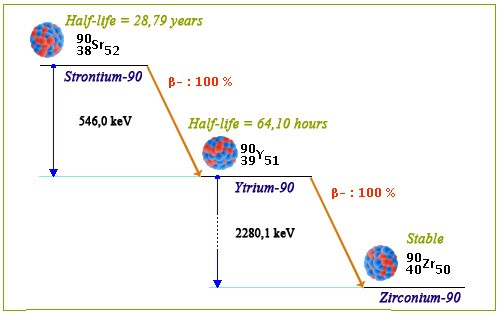

In [ ]:
E_st90 = 0.546 # MeV
# find nearest mu to Str90 decay energy
idx = np.abs(energy - E_st90).argmin()
rho_Al = 2.7 # g/cm^3
mu_gamma_str90 = mu_gamma[idx] * rho_Al
mu_beta_str90 = mu_beta[idx]   * rho_Al


In [ ]:
gamma_offset = 1
I_model_gamma = gamma_offset * np.max(I_rel) * np.exp(-mu_gamma_str90 * d*1e-2) 
I_model_beta = np.max(I_rel) * np.exp(-mu_beta_str90 * d*1e-2) 
plt.errorbar(d*1e-3, np.log(I_rel), yerr=I_err/I_rel, linestyle='', label='Measurements')
plt.xlabel('width Al, [mm]')
plt.ylabel(r'Relative intesity $\log I/I_{bck}$, [counts/s]')
plt.axhline(0, color='green', label='Background')
offset = 1.3
plt.plot(d*1e-3,  offset + np.log(I_model_gamma), label='Gamma')
plt.plot(d*1e-3, np.log(I_model_beta), label='Beta')
plt.grid()
plt.legend()